In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [134]:
df = pd.read_csv('Diamonds.csv')

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [135]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [136]:
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [137]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Length: 53940, dtype: bool

In [138]:
# Mapping color (D to Z) to integers
color_mapping = {'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7, 'K': 8, 'L': 9, 'M': 10,
                 'N': 11, 'O': 12, 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'U': 18, 'V': 19, 'W': 20,
                 'X': 21, 'Y': 22, 'Z': 23}

# Mapping cut to numeric values
cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}

# Apply mappings to the dataframe
df['color'] = df['color'].map(color_mapping)
df['cut'] = df['cut'].map(cut_mapping)

# Display the first few rows of the modified dataframe
print(df.head())

   carat  cut  color clarity  depth  table  price     x     y     z
0   0.23    5      2     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    4      2     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23    2      2     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    4      6     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31    2      7     SI2   63.3   58.0    335  4.34  4.35  2.75


<Axes: >

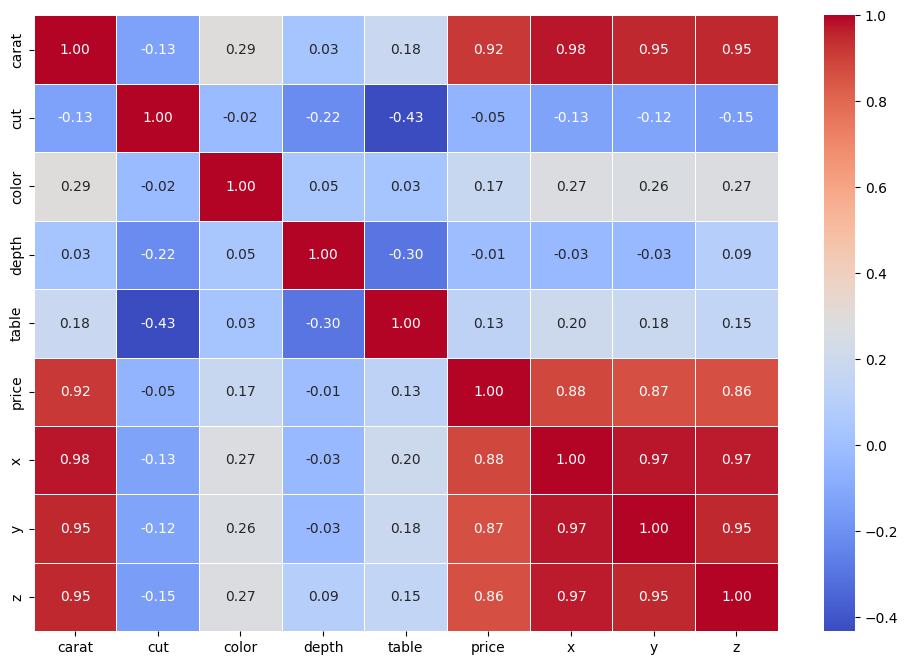

In [139]:
plt.figure(figsize=(12, 8))  # Adjust size as necessary
df_numeric = df.select_dtypes(include=[float, int])
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

In [140]:
X = df[['x', 'y', 'z', 'carat']]  # Correctly select multiple columns
y = df['price']  # Target variable

In [141]:
X


,x,y,z,carat
0,3.95,3.98,2.43,0.23
1,3.89,3.84,2.31,0.21
2,4.05,4.07,2.31,0.23
3,4.20,4.23,2.63,0.29
4,4.34,4.35,2.75,0.31
...,...,...,...,...
53935,5.75,5.76,3.50,0.72
53936,5.69,5.75,3.61,0.72
53937,5.66,5.68,3.56,0.70
53938,6.15,6.12,3.74,0.86


In [142]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

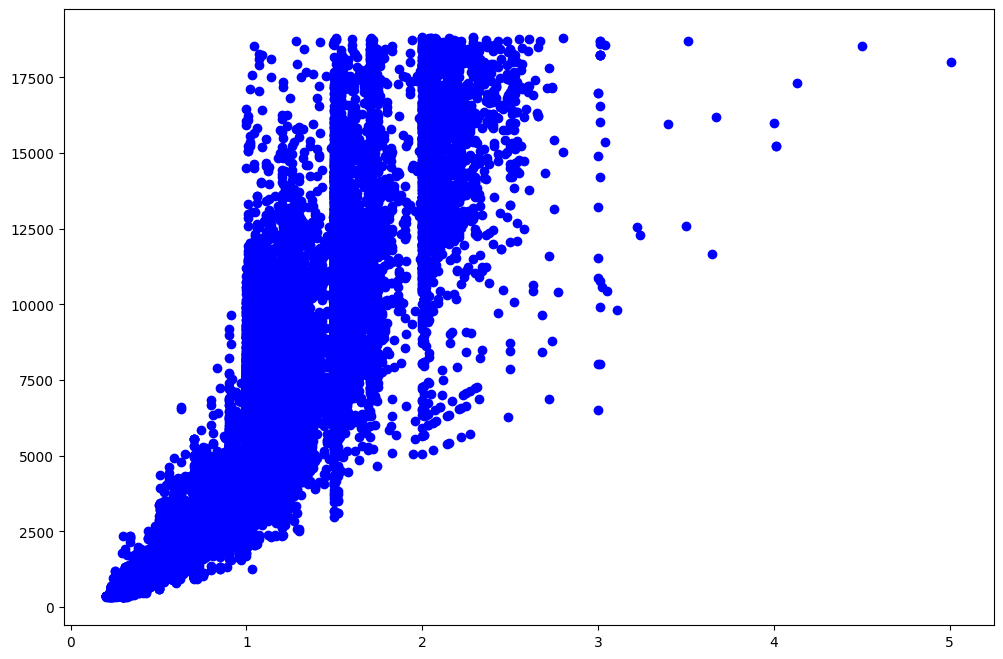

In [143]:
plt.figure(figsize=(12, 8)) 
plt.scatter(X['carat'], y, color='blue' )


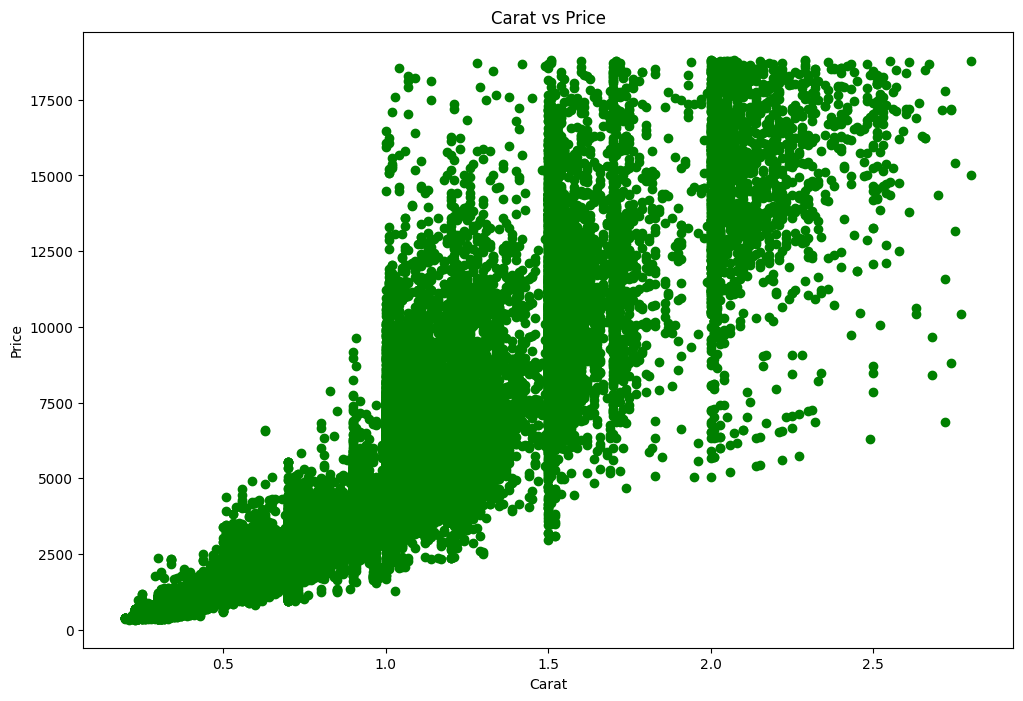

In [144]:
# Filter the DataFrame for 'carat' less than 3
df = df[df['carat'] < 3]

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df['carat'], df['price'], color='green')

# Add labels and title
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Carat vs Price')

# Show the plot
plt.show()

Mean Squared Error: 2193893.664100545
R-squared: 0.8586063786429587


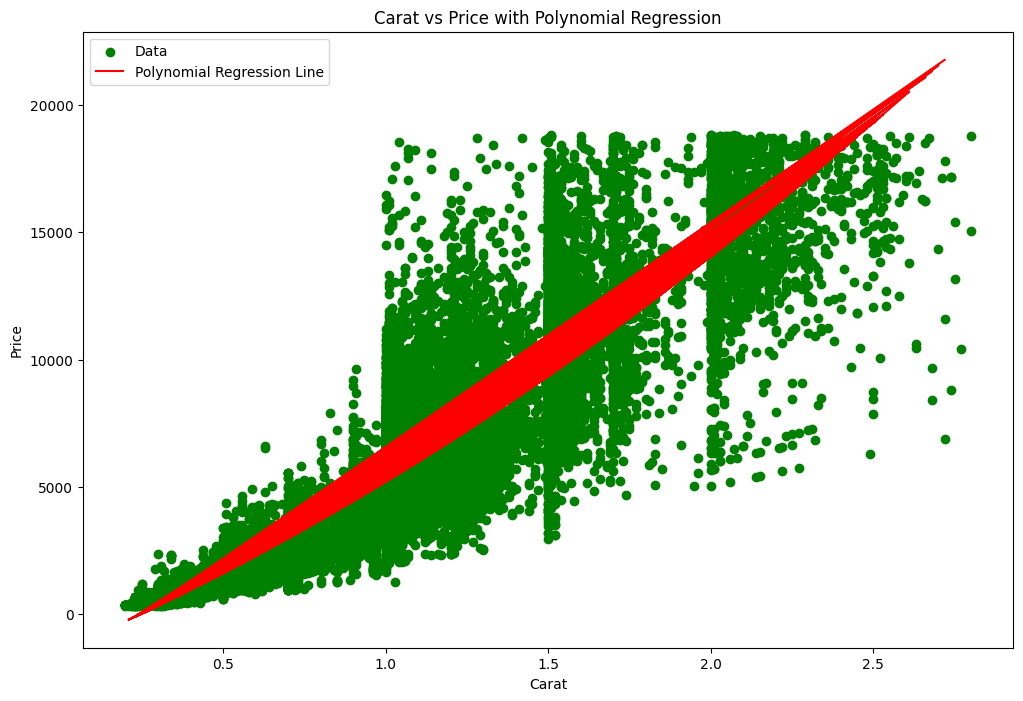

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = df[['carat']]  # Features (independent variable)
y = df['price']    # Target (dependent variable)

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a PolynomialFeatures object to transform our data for polynomial regression
poly = PolynomialFeatures(degree=2)  # You can try different degrees (e.g., 2, 3, etc.)

# Transform the training and testing features to include polynomial terms
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model with the training data
model.fit(X_train_poly, y_train)

# Predict the target on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the original data and the polynomial regression line
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='green', label='Data')
plt.plot(X_test, y_pred, color='red', label='Polynomial Regression Line')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Carat vs Price with Polynomial Regression')
plt.legend()
plt.show()
